In [ ]:
#!pip install autoviz -q

     |████████████████████████████████| 50 kB 2.6 MB/s 
     |████████████████████████████████| 132 kB 14.4 MB/s 
     |████████████████████████████████| 3.1 MB 36.2 MB/s 


In [ ]:
#!pip install pandas_profiling==2.9.0 -U -q

     |████████████████████████████████| 258 kB 8.4 MB/s 
     |████████████████████████████████| 4.7 MB 61.9 MB/s 
     |████████████████████████████████| 64 kB 3.9 MB/s 
     |████████████████████████████████| 675 kB 52.6 MB/s 
     |████████████████████████████████| 812 kB 49.6 MB/s 
     |████████████████████████████████| 38.2 MB 22 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#!pip install shap -q 

     |████████████████████████████████| 371 kB 7.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


# Exploratory Data Analysis Part 1

In this bootcamp we will focus on analysing data set statistics to gain insight into the data. We do this to refrain ourself of making assumptions. This will help you identify errors, detect outliers and help finding important relations among the variables.

To do this we will use the diabetes readmission dataset: https://www.hindawi.com/journals/bmri/2014/781670/ 

*Citation:*
Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records", BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014. https://doi.org/10.1155/2014/781670

First off, let's start by loading the dataset and look at the present features


In [ ]:
#19poGUSrTmdbEEvottmW1m4_g4XXUVJV-
#1F02asXEhj18p8PAgdXIKhdID0OK4B-0w
#1Bp3kLLy-RmloCOFmJbgBILAlGDLb_-3H
#1PmJZcrMsG7vsp2QT5Cjbzw9mXIp4LS7c

# if you run in to trouble with this command, take another one of the links above and try again

!gdown --id 19poGUSrTmdbEEvottmW1m4_g4XXUVJV-

Downloading...
From: https://drive.google.com/uc?id=19poGUSrTmdbEEvottmW1m4_g4XXUVJV-
To: /content/Diabetes.csv
100% 26.6M/26.6M [00:00<00:00, 27.4MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Diabetes.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,'Caucasian','Female','[0-10)','?',6,25,1,1,'?','Pediatrics-Endocrinology',41,0,1,0,0,0,'250.83','?','?',1,'None','None','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','NO'
1,149190,55629189,'Caucasian','Female','[10-20)','?',1,1,7,3,'?','?',59,0,18,0,0,0,'276','250.01','255',9,'None','None','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','Up','No','No','No','No','No','Ch','Yes','>30'
2,64410,86047875,'AfricanAmerican','Female','[20-30)','?',1,1,7,2,'?','?',11,5,13,2,0,1,'648','250','V27',6,'None','None','No','No','No','No','No','No','Steady','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','Yes','NO'
3,500364,82442376,'Caucasian','Male','[30-40)','?',1,1,7,2,'?','?',44,1,16,0,0,0,'8','250.43','403',7,'None','None','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','No','Up','No','No','No','No','No','Ch','Yes','NO'
4,16680,42519267,'Caucasian','Male','[40-50)','?',1,1,7,1,'?','?',51,0,8,0,0,0,'197','157','250',5,'None','None','No','No','No','No','No','No','Steady','No','No','No','No','No','No','No','No','No','No','Steady','No','No','No','No','No','Ch','Yes','NO'


### Excersize 1
A) Check all variables and look up any that you might be unfamilliar with.

B) Use .info() and ProfilingReport to study the data

C) Find at least 3 variables that are irrelevant and drop them from the dataset

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(df, explorative=True)

Summarize dataset:   0%|          | 0/64 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

Looking at the Pandas profile report you might have noticed that there are no missing values. If you take a closer look at the dataframe you see that there are actually a lot of missing values.

### Excersize 2

A) Replace the '?' with NaN values. 

B) Replace the readmitted collumn with values 0 & 1 where 0 means not-readmitted and 1 means readmitted.

C) Plot the distribution of readmitted to see if the dataset is balanced.

In [ ]:
import numpy as np
df = df.replace("'?'", np.nan)

In [ ]:
df = df.replace({"'NO'":0, "'<30'":1, "'>30'":1})

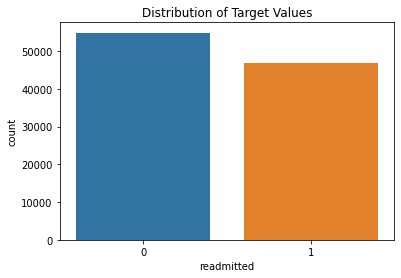

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = "readmitted", data = df)
plt.title("Distribution of Target Values")
plt.show()

### Excersize 3

A) Plot the following distributions:
  - Age on readmission
  - Gender on readmission
  - Race on readmission

B) Plot the probabillities for each of the variables named in excersize 3A

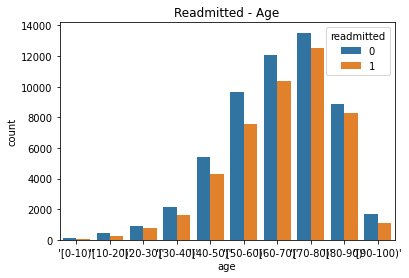

In [ ]:
sns.countplot(x="age", hue= "readmitted", data = df)
plt.title("Readmitted - Age")
plt.show()

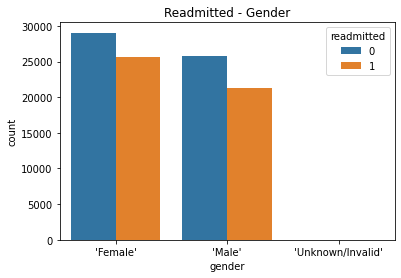

In [ ]:
sns.countplot(x="gender", hue= "readmitted", data = df)
plt.title("Readmitted - Gender")
plt.show()

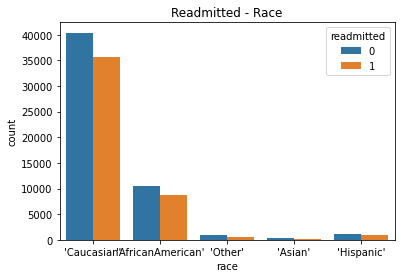

In [ ]:
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

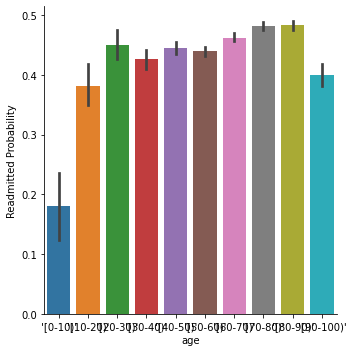

In [ ]:
g = sns.catplot(x = "age", y = "readmitted", data = df, 
                   kind = "bar", height = 5)
g.set_ylabels("Readmitted Probability")
plt.show()

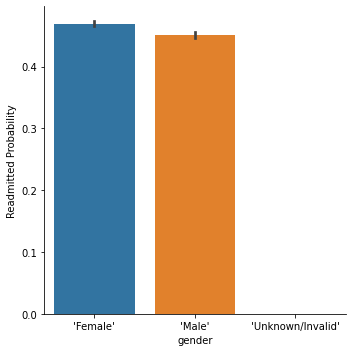

In [ ]:
g = sns.catplot(x = "gender", y = "readmitted", data = df, 
                   kind = "bar", height = 5)
g.set_ylabels("Readmitted Probability")
plt.show()

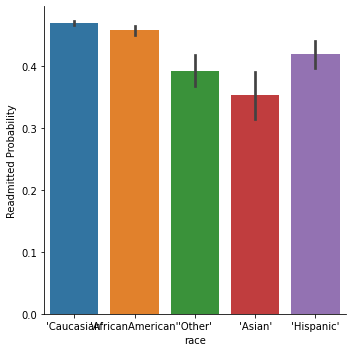

In [ ]:
g = sns.catplot(x = "race", y = "readmitted", data = df, 
                   kind = "bar", height = 5)
g.set_ylabels("Readmitted Probability")
plt.show()

To be able to use the categorical variables for prediction we need to make numerical values for the categories.

### Excersize 4

A) Convert the numeric bins of Age to numbers. (0-10 becomes 5, 10-20 becomes 15 etc)

B) Do the same for weight

C) Use Scikit-learns labelEncoder to create numerical values for gender.

D) Create dummy variables for the variable race

E) Drop the new variable race 'Other' (We do this to deal with the dummy variable trap. By removing one of the dummies we decrease the multicollinearity. We won't go into detail about this but you should be aware of its existence and we recommend you look it up)

In [ ]:
df.age = df.age.replace({"'[90-100)'":95,
                         "'[80-90)'":85,
                         "'[70-80)'":75,
                         "'[60-70)'":65,
                         "'[50-60)'":55,
                         "'[40-50)'":45,
                         "'[30-40)'":35,
                         "'[20-30)'":25,
                         "'[10-20)'":15,
                         "'[0-10)'":5})

In [ ]:
df.weight = df.weight.replace({"'[0-25)'":10,
                               "'[25-50)'":35,
                               "'[50-75)'":60,
                               "'[75-100)'":85,
                               "'[100-125)'":110,
                               "'[125-150)'":135,
                               "'[150-175)'":160,
                               "'[175-200)'":185,
                               "'>200'":205})

In [ ]:
np.unique(df.gender.astype('str'))

array(["'Female'", "'Male'", "'Unknown/Invalid'"], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
bla = enc.fit_transform(df[['gender']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
bla

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
df_dum = pd.get_dummies(df, columns=['race'])

In [ ]:
df_dum = df_dum.drop(columns=["race_'Other'"])

### Exersize 5

A) Check for NaN values. Drop columns if the are missing more than half of the values

B) Create a new dataset with only the numerical variables.

In [ ]:
df_dum = df_dum.drop(columns=['weight', 'encounter_id', 'patient_nbr'])

In [ ]:
df_num = df_dum.select_dtypes(exclude=['object'])

### Exersize 6 - Feature Selection

A) Create X & y where X is all the numerical variables exexpt 'readmitted' and y is 'readmitted

B) Use RFECV to determine what the best number of features is to train a model (tip: if this takes a very long time, increase the steps.)

C) Create a new version of X called X_new with only the most important features.

D) Train a classifier of your choice on both the X dataset and X_new dataset and see if there is any difference. (Tip: use sklearns classification raport to see the results of your model) It can happen that there is almost no difference.

Sometimes the accuracy of your model can decrease after feature selection. But this is not necessarily a bad thing. Remember that your also using feature selection to battle overfitting, decrease training time and increase explainability.

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

In [ ]:
df_num = df_num.dropna()

X = df_num.drop(columns=['readmitted'])
y = df_num['readmitted']

est = DecisionTreeClassifier()
select = RFECV(est, step=3, cv=5)
X_new = select.fit_transform(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True)
X_ntrain, X_ntest, y_ntrain, y_ntest = train_test_split(X_new,y, shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=20, n_jobs = -1, max_depth=5)
nmodel = RandomForestClassifier(n_estimators=20, n_jobs = -1, max_depth=5)

#model = AdaBoostClassifier()
#nmodel = AdaBoostClassifier()

model.fit(X_train,y_train)
nmodel.fit(X_ntrain, y_ntrain)

RandomForestClassifier(max_depth=5, n_estimators=20, n_jobs=-1)

In [ ]:
y_pred = model.predict(X_test)
y_npred = nmodel.predict(X_ntest)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69     13629
           1       0.64      0.47      0.54     11813

    accuracy                           0.63     25442
   macro avg       0.63      0.62      0.62     25442
weighted avg       0.63      0.63      0.62     25442



In [ ]:
print(classification_report(y_ntest,y_npred))

              precision    recall  f1-score   support

           0       0.62      0.79      0.70     13628
           1       0.65      0.45      0.53     11814

    accuracy                           0.63     25442
   macro avg       0.64      0.62      0.61     25442
weighted avg       0.63      0.63      0.62     25442



### Exersize 7 - SHAP

https://shap.readthedocs.io/en/latest/tabular_examples.html 

A) install and import shap

B) Search in the link above which explainer fits for the model that you have trained in exersize 6

C) Create shap_values and run a shap.summary_plot ([Here](https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=The%20Random%20Forest%20algorithm%20has,be%20computed%20in%20two%20ways%3A&text=We%20can%20measure%20how%20each,average%20it%20decreases%20the%20impurity.) you can find a nice example of how that is done)

D) Look up how to get the feature importance values from the model you trained. And compare it to the shap values.



In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(nmodel)
shap_values = explainer.shap_values(X_ntest)

In [ ]:
X_ntest

array([[75,  3,  3, ...,  8,  0,  9],
       [65,  2, 14, ..., 30,  0,  9],
       [85,  1,  7, ..., 22,  0,  9],
       ...,
       [75,  1,  5, ...,  9,  1,  9],
       [75,  1,  3, ..., 13,  0,  8],
       [55,  1,  3, ..., 25,  0,  9]])

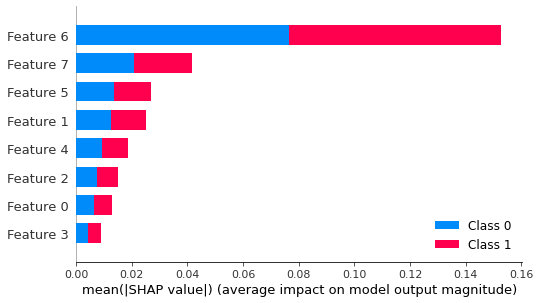

In [ ]:
shap.summary_plot(shap_values, X_ntest )

# Part 2. 

For this second part we look at the Exoplanets dataset from github. This dataset exists of information about 3839 exo planets. Unfortunatly there is a lot of information missing. It is up to you to clean the data set in order to be able to predict the temperature on any given planet. 

Start of by loading in the dataset and generating a pandas profile report.

In [ ]:
! git clone https://github.com/OpenExoplanetCatalogue/oec_tables.git

In [ ]:
import pandas as pd
oec = pd.read_csv('oec_tables/comma_separated/open_exoplanet_catalogue_kepler.txt')
oec.head()

### Exercise 1

A) Create a new dataset where you only keep the columns with at least 75% of the values.

B) Run the pandas profiling report on this dataset

C) Drop the columns that have no influence on the prediction of temperature. Use the correlation matrix from the report

In [ ]:
threshhold = len(oec) * 0.75

oec = oec.dropna(thresh = threshhold, axis=1) 

oec = oec.drop(columns=['binaryflag','name', 'system_rightascension', 'system_declination', 'list'])

In [ ]:
oec.info()

### Exercise 2

A) Install autoviz and use it to visualize this dataset.

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
 
AV = AutoViz_Class()

In [ ]:
viz = AV.AutoViz(filename = '',dfte=oec, depVar='temperature', lowess=False, verbose=1)

### Exercise 3

A) Check correlation matrix for multicollinearity and check if there are confounding variables.

B) Delete potential confounding variables

In [ ]:
oec = oec.drop(columns=['period'])

### Exercise 4

A) Check the boxplot for each variable to get insight in any potential outliers.

B) Write a function that takes a dataframe and lists all the indexes of potential outliers. Make sure that you can change the percentages in the arguments of your function. (e.g. def outliers(df, 0.05, 0.95) takes the upper and lower 5% as outliers.)

C) Calculate the z-scores for each variable. (Tip: use the scipy libraby)

D) Drop rows with z-score values higher than 3.

In [ ]:
def outliers(col_name,Q1,Q3):
  quantile1 =  oec[col_name].quantile(Q1)
  quantile3 = oec[col_name].quantile(Q3)
  IQR = quantile3 - quantile1
  return oec[(oec[col_name] < Q1-1.5*IQR ) | (oec[col_name] > Q3+1.5*IQR)][col_name]

In [ ]:
out_list = []
for i in oec.columns:
  if 'hoststar' in i:
    break
  out = outliers(i,0.01,0.99)
  x = out.index[0:len(out)]
  x = x.tolist()
  out_list.extend(x)

In [ ]:
from scipy.stats import zscore

In [ ]:
z_scores = zscore(oec)

In [ ]:
high = z_scores[(z_scores > 3).any(axis=1)]

In [ ]:
oec = oec.drop(high.index)